In [22]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [4]:
path = r'c:\\Users\\gcich\\OneDrive\\Pulpit\\Magister\\Semestr1\\AnalizaDanychWNOZ\\DataAnalisysInEarthSciences_2024\\src\\data_preparation'
shapefile_path = os.path.join(path, '..','..','data','raw','Wojewodztwa.shp')
woj = gpd.read_file(shapefile_path)
woj

,JPT_NAZWA_,JPT_KOD_JE,geometry
0,śląskie,24,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,opolskie,16,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,świętokrzyskie,26,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."
3,pomorskie,22,"POLYGON ((17.66483 54.78297, 17.66653 54.78334..."
4,podlaskie,20,"POLYGON ((21.98108 52.97859, 21.98078 52.97861..."
5,zachodniopomorskie,32,"POLYGON ((14.81157 54.04037, 14.89525 54.05570..."
6,dolnośląskie,02,"POLYGON ((15.10534 51.42730, 15.10540 51.42732..."
7,wielkopolskie,30,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
8,podkarpackie,18,"POLYGON ((22.03538 50.80675, 22.03550 50.80681..."
9,małopolskie,12,"POLYGON ((19.97230 50.51625, 19.97227 50.51633..."


<AxesSubplot: >

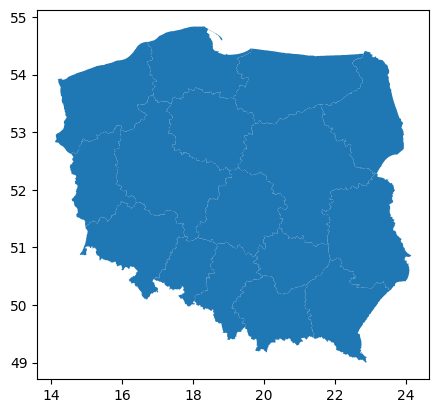

In [5]:
woj.plot()

In [23]:
stations = pd.read_csv(os.path.join(path, '..','..','data','external','kody_stacji.csv'), encoding='iso-8859-2',delimiter=';')
stations.columns = ['LP.', 'ID', 'Nazwa', 'Rzeka', 'Szerokość geograficzna',
       'Długość geograficzna', 'Wysokość n.p.m.']

stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LP.                     641 non-null    int64 
 1   ID                      641 non-null    int64 
 2   Nazwa                   641 non-null    object
 3   Rzeka                   639 non-null    object
 4   Szerokość geograficzna  641 non-null    object
 5   Długość geograficzna    638 non-null    object
 6   Wysokość n.p.m.         602 non-null    object
dtypes: int64(2), object(5)
memory usage: 35.2+ KB


In [24]:

def change_col_order(row):
    pattern = r'^[^\d]+$'
    if not re.match(pattern,str(row['Rzeka'])):
        print(row)
        row['Wysokość n.p.m.'] = row['Długość geograficzna']
        row['Długość geograficzna'] = row['Szerokość geograficzna']
        row['Szerokość geograficzna'] = row['Rzeka']
        row['Rzeka'] = np.nan
    return row
        

In [25]:
stations = stations.apply(lambda row: change_col_order(row),axis=1)

 

LP.                              588
ID                         250180690
Nazwa                     PILCHOWICE
Rzeka                       50 13 27
Szerokość geograficzna      18 35 31
Długość geograficzna        18 35 31
Wysokość n.p.m.                  NaN
Name: 587, dtype: object
LP.                             589
ID                        249201030
Nazwa                         DOBRA
Rzeka                      49 43 39
Szerokość geograficzna     20 16 24
Długość geograficzna            427
Wysokość n.p.m.                 NaN
Name: 588, dtype: object
LP.                             590
ID                        250190780
Nazwa                     BĘDKOWICE
Rzeka                      50 10 45
Szerokość geograficzna     19 46 10
Długość geograficzna            434
Wysokość n.p.m.                 NaN
Name: 589, dtype: object
LP.                               591
ID                          249210350
Nazwa                     MOSZCZANIEC
Rzeka                        49 25 20
Szerokość 

In [26]:
stations[stations['LP.'] == 624]

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.
623,624,250150560,MAŁA KOPA,NaN,50 44 37,15 43 34,1341


In [27]:
def convert_to_lon_lat(coord):
    coord_tab = str(coord).split(' ')
    if len(coord_tab) == 2:
       res =float(coord_tab[0]) +  float(coord_tab[1])/60
    elif len(coord_tab) == 3:
       res = float(coord_tab[0]) +  float(coord_tab[1])/60 + float(coord_tab[2])/3600
    else:
        res = float(coord_tab[0])
    return res

In [28]:
stations['lon'] = stations.apply(lambda row: convert_to_lon_lat(str(row['Długość geograficzna'])), axis=1)
stations['lat'] = stations.apply(lambda row: convert_to_lon_lat(str(row['Szerokość geograficzna'])), axis=1)
stations

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,lon,lat
0,1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216,18.483056,50.154444
1,2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7,14.731667,54.022222
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840,16.394167,50.330000
3,4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800,16.773056,50.218333
4,5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453,16.670833,50.153333
...,...,...,...,...,...,...,...,...,...
636,637,250140020,SIENIAWKA,Nysa Łużycka,50 53 38,14 50 08,234,14.835556,50.893889
637,638,250160920,PIŁAWA GÓRNA,Piława,50 41 22,16 43 57,295,16.732500,50.689444
638,639,249180590,RUPTAWA,Olza,49 56 12,18 35 22,230,18.589444,49.936667
639,640,250180760,STRZELCE OPOLSKIE,Mała Panew,50 31 04,18 18 40,229,18.311111,50.517778


In [29]:
stations = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations['lon'], stations['lat']))
stations

,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,lon,lat,geometry
0,1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216,18.483056,50.154444,POINT (18.48306 50.15444)
1,2,254140010,DZIWNÓW,NaN,54 01 20,14 43 54,7,14.731667,54.022222,POINT (14.73167 54.02222)
2,3,250160530,ZIELENIEC,Bystrzyca Dusznicka,50 19 48,16 23 39,840,16.394167,50.330000,POINT (16.39417 50.33000)
3,4,250160630,MIĘDZYGÓRZE,Wilczka,50 13 06,16 46 23,800,16.773056,50.218333,POINT (16.77306 50.21833)
4,5,250160650,MIĘDZYLESIE,Nysa Kłodzka,50 09 12,16 40 15,453,16.670833,50.153333,POINT (16.67083 50.15333)
...,...,...,...,...,...,...,...,...,...,...
636,637,250140020,SIENIAWKA,Nysa Łużycka,50 53 38,14 50 08,234,14.835556,50.893889,POINT (14.83556 50.89389)
637,638,250160920,PIŁAWA GÓRNA,Piława,50 41 22,16 43 57,295,16.732500,50.689444,POINT (16.73250 50.68944)
638,639,249180590,RUPTAWA,Olza,49 56 12,18 35 22,230,18.589444,49.936667,POINT (18.58944 49.93667)
639,640,250180760,STRZELCE OPOLSKIE,Mała Panew,50 31 04,18 18 40,229,18.311111,50.517778,POINT (18.31111 50.51778)


In [30]:
stations.set_crs('EPSG:9702',inplace=True)
joined = gpd.sjoin(stations, woj, op='within')
joined

c:\Users\gcich\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,LP.,ID,Nazwa,Rzeka,Szerokość geograficzna,Długość geograficzna,Wysokość n.p.m.,lon,lat,geometry,index_right,JPT_NAZWA_,JPT_KOD_JE
0,1,250180590,RYBNIK-STODOŁY,Ruda,50 09 16,18 28 59,216,18.483056,50.154444,POINT (18.48306 50.15444),0,śląskie,24
11,12,250180190,KRUPSKI MŁYN,Mała Panew,50 34 09,18 37 24,225,18.623333,50.569167,POINT (18.62333 50.56917),0,śląskie,24
12,13,250180270,WIERKLANIEC,Brynica,50 25 44,18 56 33,285,18.942500,50.428889,POINT (18.94250 50.42889),0,śląskie,24
17,18,249180020,WARSZOWICE,Pszczynka,49 59 31,18 42 20,270,18.705556,49.991944,POINT (18.70556 49.99194),0,śląskie,24
18,19,249180070,MAZAŃCOWICE,Wapienica,49 51 45,18 58 10,269,18.969444,49.862500,POINT (18.96944 49.86250),0,śląskie,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,581,254170020,SMOŁDZINO,Łupawa,54 40 02,17 12 06,4,17.201667,54.667222,POINT (17.20167 54.66722),3,pomorskie,22
585,586,253170370,UPIŁKA,Wda,53 56 49,17 56 49,141,17.946944,53.946944,POINT (17.94694 53.94694),3,pomorskie,22
586,587,253180270,SKÓRCZ-RYZOWIE,Wierzyca,53 47 18,18 32 13,85,18.536944,53.788333,POINT (18.53694 53.78833),3,pomorskie,22
599,600,254180270,ZELEWO,NaN,54 37 23,18 04 31,43,18.075278,54.623056,POINT (18.07528 54.62306),3,pomorskie,22


Text(0.5, 1.0, 'Points and Polygons Plot')

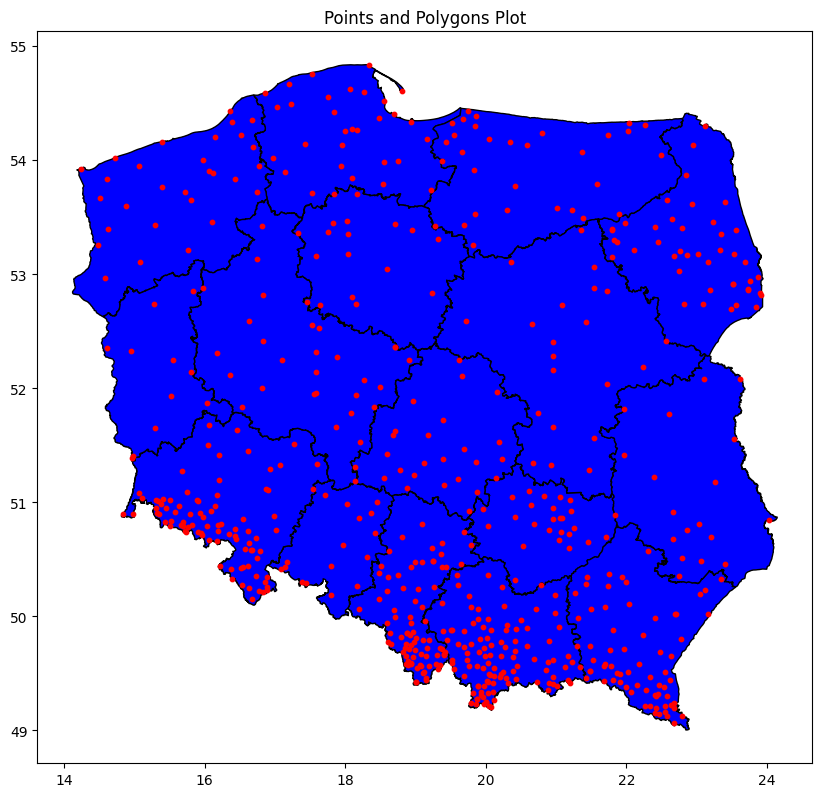

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

woj.plot(ax=ax, color='blue', edgecolor='black')
# Plot points from gdf_points
stations.plot(ax=ax, color='red', markersize=10)
# Plot polygons from gdf_polygons




# Set plot title
plt.title("Points and Polygons Plot")

In [36]:
stations_podkarp = joined[joined['JPT_NAZWA_'] == 'podkarpackie']

In [51]:
stations_podkarp[['ID','Rzeka','geometry','JPT_NAZWA_']]

,ID,Rzeka,geometry,JPT_NAZWA_
60,249210010,Wisłoka,POINT (21.30833 49.98722),podkarpackie
61,249210040,Wisłok,POINT (21.81639 49.87778),podkarpackie
63,249210080,Jasiołka,POINT (21.48500 49.73556),podkarpackie
186,249210120,Wisłoka,POINT (21.53333 49.61167),podkarpackie
187,249210190,Wisłok,POINT (21.86556 49.50083),podkarpackie
...,...,...,...,...
509,250230170,Tanew,POINT (23.34278 50.32972),podkarpackie
576,249220360,Solinka,POINT (22.41361 49.30583),podkarpackie
590,249210350,NaN,POINT (21.91250 49.42222),podkarpackie
591,249220370,NaN,POINT (22.55222 49.21583),podkarpackie


In [61]:
df = pd.read_csv('c:\\Users\\gcich\\OneDrive\\Pulpit\\Magister\\Semestr1\\AnalizaDanychWNOZ\\DataAnalisysInEarthSciences_2024\\src\\data_preparation\\..\\..\\data\\raw\\merged_data.csv', encoding='utf-8-sig')


C:\Users\gcich\AppData\Local\Temp\ipykernel_5840\424666247.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('c:\\Users\\gcich\\OneDrive\\Pulpit\\Magister\\Semestr1\\AnalizaDanychWNOZ\\DataAnalisysInEarthSciences_2024\\src\\data_preparation\\..\\..\\data\\raw\\merged_data.csv', encoding='utf-8-sig')


In [75]:
# pd.to_datetime(str(df['Dzień'])+'-'+str(df['Miesiąc'])+'-'+str(df['Rok']))



,min,max
Nazwa stacji,,
BRZEGI DOLNE,1993-01-01,2024-01-31
BUKOWIEC,2019-04-05,2024-01-31
CHORZELÓW,2022-09-08,2024-01-28
CISNA,1991-01-01,2024-01-31
DWERNIK,1991-01-01,2020-12-31
FUTORY,1991-01-01,2015-12-31
JAROSŁAW,1991-01-01,2019-12-31
JASŁO,1995-01-01,2024-01-27
JAŚLISKA,1991-01-01,2024-01-31


In [69]:
df[['Dzień', 'Miesiąc', 'Rok']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Dzień    180021 non-null  int64
 1   Miesiąc  180021 non-null  int64
 2   Rok      180021 non-null  int64
dtypes: int64(3)
memory usage: 4.1 MB
